In [170]:
import pandas as pd
import numpy as np

In [186]:
df = pd.read_csv(r"C:\Users\user\Desktop\portfolio file\diabetic_data.csv")

print(df.head())


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [188]:
# Replace '?' with NaN in the dataset
df.replace("?", np.nan, inplace=True)

# Check if '?' is replaced
print(df.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [190]:
# Step 2: Drop columns with more than 50% missing data
threshold = len(df) * 0.5
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Check the shape of the cleaned dataset
print("Shape of the cleaned dataset:\n", df_cleaned.shape)

# Display the columns that remain
print("\nColumns remaining after dropping columns with >50% missing data:\n", df_cleaned.columns)

Shape of the cleaned dataset:
 (101766, 47)

Columns remaining after dropping columns with >50% missing data:
 Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object'

In [194]:
# Step 3: Fill missing values for numerical columns with the mean
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].mean())

# Step 3: Fill missing values for categorical columns with the mode
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Check for any remaining missing values
missing_values = df_cleaned.isnull().sum()
print("\nRemaining missing values:\n", missing_values)

C:\Users\user\AppData\Local\Temp\ipykernel_7272\753263001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].mean())
C:\Users\user\AppData\Local\Temp\ipykernel_7272\753263001.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])



Remaining missing values:
 encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose    

In [196]:
df_cleaned.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


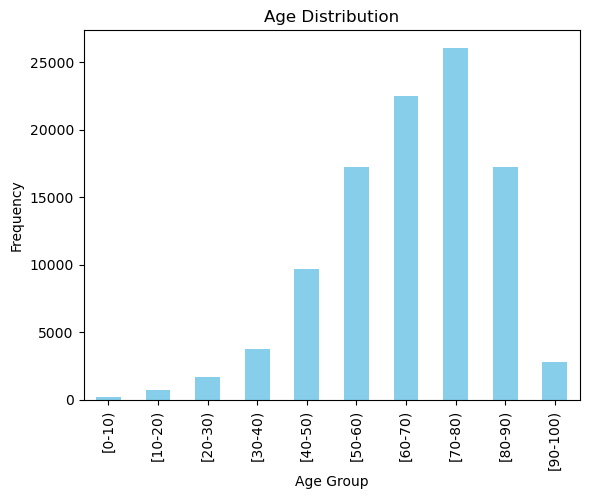

In [198]:
import matplotlib.pyplot as plt
df_cleaned['age'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

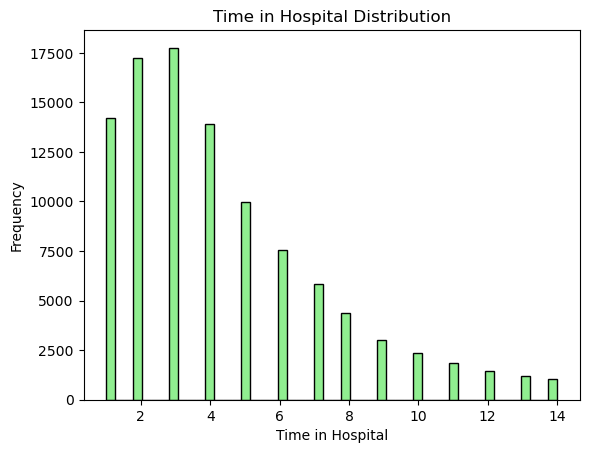

In [200]:
df_cleaned['time_in_hospital'].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black')
plt.title('Time in Hospital Distribution')
plt.xlabel('Time in Hospital')
plt.ylabel('Frequency')
plt.show()

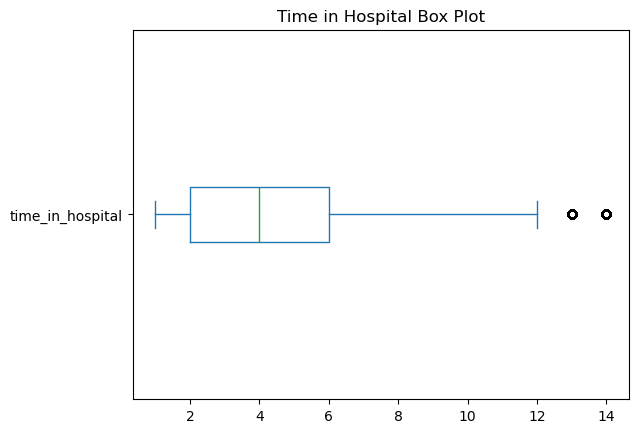

In [202]:
df_cleaned['time_in_hospital'].plot(kind='box', vert=False)
plt.title('Time in Hospital Box Plot')
plt.show()

In [206]:
df_numeric = df_cleaned.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

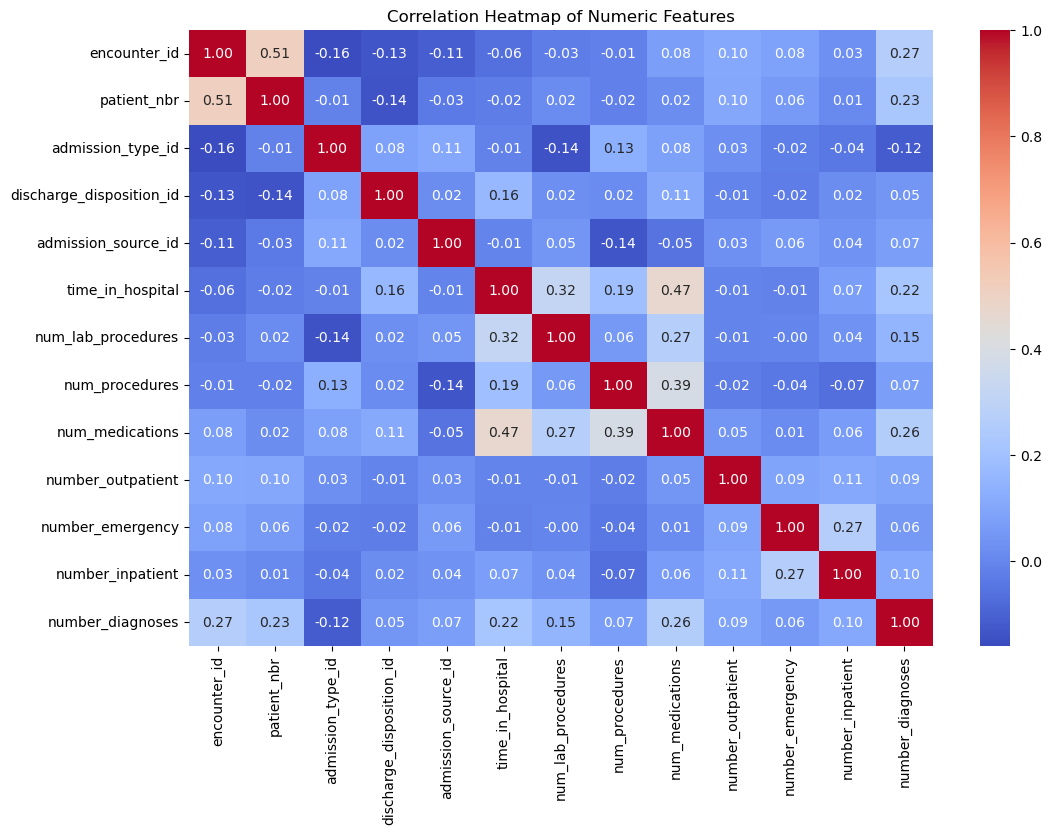

In [208]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [210]:
avg_time_age = df_cleaned.groupby('age')['time_in_hospital'].mean()
print(avg_time_age)

age
[0-10)      2.546584
[10-20)     3.191027
[20-30)     3.564876
[30-40)     3.799735
[40-50)     4.039649
[50-60)     4.125753
[60-70)     4.382244
[70-80)     4.590878
[80-90)     4.808629
[90-100)    4.755818
Name: time_in_hospital, dtype: float64


In [212]:
readmission_by_discharge = df_cleaned.groupby('discharge_disposition_id')['readmitted'].value_counts(normalize=True).unstack()
print(readmission_by_discharge)

readmitted                     <30       >30        NO
discharge_disposition_id                              
1                         0.093004  0.357223  0.549773
2                         0.160714  0.313910  0.525376
3                         0.146625  0.352300  0.501075
4                         0.127607  0.341104  0.531288
5                         0.208615  0.295608  0.495777
6                         0.126957  0.415594  0.457448
7                         0.144462  0.354735  0.500803
8                         0.138889  0.351852  0.509259
9                         0.428571  0.095238  0.476190
10                             NaN  0.666667  0.333333
11                             NaN       NaN  1.000000
12                        0.666667       NaN  0.333333
13                        0.047619  0.090226  0.862155
14                        0.064516  0.018817  0.916667
15                        0.444444  0.285714  0.269841
16                             NaN  0.545455  0.454545
17        

In [214]:
pivot_table = df_cleaned.pivot_table(values='time_in_hospital', index='admission_type_id', columns='readmitted', aggfunc='mean')
print(pivot_table)

readmitted              <30       >30        NO
admission_type_id                              
1                  4.745379  4.439018  4.256817
2                  4.970474  4.699783  4.478418
3                  4.701683  4.532196  4.144508
4                  2.000000  3.000000  3.428571
5                  4.078788  3.989541  3.893344
6                  5.196246  4.742268  4.294260
7                       NaN       NaN  4.857143
8                  2.851852  3.142857  3.057416


In [216]:
df_cleaned.to_csv('cleaned_data.csv', index=False)